<h1><center>Tarea 9: Algoritmos Genéticos</center></h1>
<p><center><b>Adrián Rubén Bedón Campaña</b></center></p>
<p><center><b>Xavier Alejandro Ramos Vásconez</b></center></p>

<h4><b>Importación de librerías</b></h4>

Para la construcción de un algoritmo genético que optimice la función *onemax* se utilizarán las librerías: NumPy *(Construcción y Manipulación de Arreglos)*, MatPlotLib *(Elaboración de gráficas de fitness de las ejecuciones)* y Copy *(Copiado de objetos)*

In [1]:
#Importación de librerías
#|-Creado por: Adrián Bedón
#|-Fecha de última modificación: 07/07/2024
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

<h4><b>Configuraciones iniciales y Definición del problema</b></h4>

<h5><b>Configuraciones</b></h5>
Se define el tamaño de la población para el algoritmo, el número de generaciones que se busca alcanzar dentro del problema para observar su evolución, y la tasa de mutación que se implementará.

<h5><b>Definición del Problema</b></h5>
El problema que se nos proporciona indica que el tamano del arreglo de bits con el que se va a trabajar tiene un tamaño de 20,y que el tamño de la población inicial será de 10 individuos.

In [2]:
#Configuraciones iniciales y Definición del problema
#|-Creado por: Adrián Bedón
#|-Fecha de última modificación: 07/07/2024
n_pop = 10 #Número de individuos de la población inicial
n_bits = 20 #Número de bits
pop_size = 100 #Tamaño de la población para el algoritmo
generations = 500 #Número de generaciones
mutation_rate = 0.1 #Tasa de mutación

<h4><b>Definición de funciones</b></h4>

Dentro de esta sección se definen las funciones que se utilizarán dentro del algoritmo genético que se construirá, de las cuales podemos mencionar:
- onemax(): Función que se busca optimizar.
- roulette(): Función de ruleta que selecciona un individuo de manera aleatoria basada en el fitness.
- crossover(): Función de cruce donde se seleeciona dos individuos padres para generar un individuo hijo.
- mutation(): Función de mutación para verificar si un indiviudo muta o no.

In [3]:
#Definición de funciones
#|-Creado por: Adrián Bedón
#|-Fecha de última modificación: 07/07/2024

# Función de fitness
def onemax(pop):
    return np.sum(pop, axis=1)

# Función de selección por ruleta
def roulette(fitness):
    total_fit = np.sum(fitness)
    pick = np.random.rand() * total_fit
    current = 0
    for i, fit in enumerate(fitness):
        current += fit
        if current > pick:
            return i
    return len(fitness) - 1

# Función de cruce (crossover)
def crossover(parent1, parent2):
    point = np.random.randint(1, n_bits-1) #Selección de padres de manera aleatoria
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

# Función de mutación
def mutation(individual, rate):
    for i in range(len(individual)):
        if np.random.rand() < rate: #Obtención de valor para saber si se aplica o no la mutación
            individual[i] = 1 - individual[i]
    return individual

<h4><b>Definición del algoritmo</b></h4>

El algoritmo que se ha construido se encuentra basado en el código proporcionado por el docente y el mismo ha sido adaptado para la problemática entregada, para las diferentes ejecuciones que se realizarán dentro de este trabajo se plantea experimentar con la implementación de elitismo para ver la forma en el que esto influye en la evolución del algoritmo.

In [4]:
#Definición del algoritmo
#|-Creado por: Adrián Bedón
#|-Fecha de última modificación: 07/07/2024

all_evolutions = []
best_individuals = []
for run in range(5):

    # Crear población inicial
    population = np.random.randint(0, 2, (pop_size, n_bits))
    new_population = np.zeros((pop_size, n_bits), dtype=int)
    evolution = []

    for gen in range(generations):
        # Evaluación de soluciones
        fitness_values = onemax(population)
        max_fitness, best_idx = np.max(fitness_values), np.argmax(fitness_values)
        evolution.append(max_fitness)
        best_individual = deepcopy(population[best_idx, :])

        # Crossover
        for i in range(0, pop_size, 2):
            parent1 = population[roulette(fitness_values), :]
            parent2 = population[roulette(fitness_values), :]
            new_population[i:i+2, :] = crossover(parent1, parent2)

        # Mutation
        for i in range(pop_size):
            population[i, :] = mutation(new_population[i, :], mutation_rate)

        if run % 2 == 0:
            # Elitism
            min_fitness, worst_idx = np.min(onemax(population)), np.argmin(onemax(population))
            population[worst_idx, :] = best_individual

    # Verificación final
    final_fitness_values = onemax(population)
    max_fitness, best_idx = np.max(final_fitness_values), np.argmax(final_fitness_values)
    evolution.append(max_fitness)

    all_evolutions.append(evolution)
    best_individuals.append(population[best_idx])

<h5><b>Gráficas</b></h5>

Se llevo a cabo la representación gráfica de las dieferente ejecuciones con el fin de evaluar sus resultados y determinar posibles conclusiones sobre estos resultados.

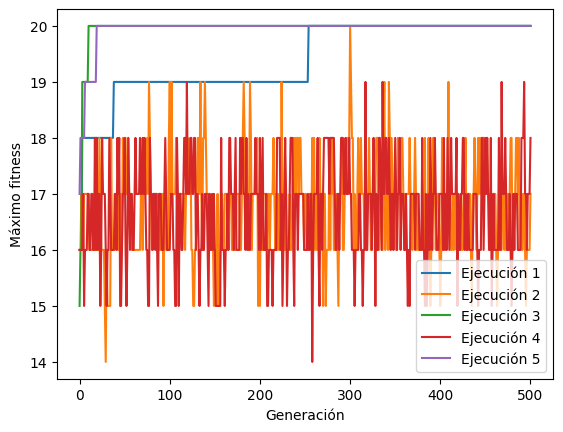

Mejor individuo de cada ejecución:
Ejecución 1: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] con fitness de 20
Ejecución 2: [1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1] con fitness de 17
Ejecución 3: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] con fitness de 20
Ejecución 4: [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1] con fitness de 18
Ejecución 5: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] con fitness de 20


In [5]:
#Gráficas
#|-Creado por: Adrián Bedón
#|-Fecha de última modificación: 07/07/2024
for i, evolution in enumerate(all_evolutions):
    plt.plot(range(generations+1), evolution, label=f'Ejecución {i+1}')

plt.xlabel('Generación')
plt.ylabel('Máximo fitness')
plt.legend()
plt.show()

# Imprimir el mejor individuo de cada ejecución
print("Mejor individuo de cada ejecución:")
for i, best_ind in enumerate(best_individuals):
    print(f"Ejecución {i+1}: {best_ind} con fitness de {np.sum(best_ind)}")

<h5><b>Análisis de Resultados</b></h5>

<h5><b>Volatilidad</b></h5>

- Las ejecuciones muestran una alta variabilidad en los resultados, lo cual es indicativo de la naturaleza estocástica del algoritmo genético. Esta variabilidad se acentúa en las ejecuciones donde no se implementó elitismo. La ausencia de elitismo puede llevar a la pérdida del mejor individuo en la población, reduciendo así la capacidad del algoritmo para retener soluciones de alta calidad. Este fenómeno es observable en las ejecuciones pares, donde se pueden ver fluctuaciones significativas en el fitness máximo alcanzado *(para este problema el mejor fitness es 20: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1])*.

<h5><b>Selección de Padres</b></h5>

- La selección aleatoria de padres para el proceso de cruce *(crossover)* es un factor crucial que contribuye a la diversidad genética dentro de la población. Esto permite que el algoritmo explore diferentes áreas del espacio de soluciones, aunque también puede introducir cierta imprevisibilidad en la evolución de la población. La falta de elitismo en las ejecuciones pares muestra cómo la selección aleatoria puede resultar en la generación de individuos con valores de fitness tanto altos como bajos, sin un patrón consistente.

<h5><b>Elitismo</b></h5>

- El uso de elitismo en el algoritmo genético asegura que el mejor individuo se conserve de una generación a otra. Esto no solo acelera la convergencia hacia soluciones óptimas, sino que también mantiene un nivel de calidad en la población. En las ejecuciones impares, donde se aplicó elitismo, se observa que el algoritmo es capaz de alcanzar y mantener un fitness máximo cercano a 20 en menos generaciones. Esto demuestra la eficacia del elitismo en preservar características beneficiosas del mejor individuo y mejorar la estabilidad y rendimiento del algoritmo.

<h5><b>Conclusiones</b></h5>

- El análisis de las distintas ejecuciones del algoritmo genético, representado en el gráfico a lo largo de las generaciones, revela cómo los parámetros diferenciados y la implementación del elitismo afectan los resultados. Las ejecuciones impares, que incluyen elitismo, muestran una mayor estabilidad y un incremento más sostenido en el máximo en comparación con las ejecuciones pares que no lo utilizan. Este comportamiento sugiere que el elitismo, al asegurar que los mejores individuos se preserven para la siguiente generación, contribuye a una mejora constante y a evitar la pérdida de soluciones óptimas. Además, el número de generaciones influye significativamente; las ejecuciones con mayor número de generaciones presentan una evolución más prolongada y consistente en la búsqueda de soluciones.
- El análisis del rendimiento del algoritmo genético en la optimización de la función onemax demuestra su eficiencia y adaptabilidad en la resolución de problemas complejos. Las ejecuciones impares, que implementaron elitismo, evidencian una mejora significativa en la calidad de las soluciones y estabilidad del fitness máximo alcanzado. Esto indica que el elitismo es una estrategia eficaz para mantener los mejores individuos y evitar la regresión en el proceso evolutivo. Además, el incremento en el número de generaciones permite al algoritmo explorar más exhaustivamente el espacio de búsqueda, logrando así soluciones óptimas. La combinación de parámetros y su correcto ajuste en conjunto con la implementación de estrategias de optimización mejoran la eficiencia del algoritmo genético permitiendo su implementación para la resolución de problemas más complejos
- Además de los parámetros y estrategias aplicados, un aspecto crucial que se puede ver dentro del análisis es la importancia de la diversidad genética dentro de la población del algoritmo. El gráfico muestra a través de las ejecuciones, particularmente aquellas sin elitismo, hay una mayor variabilidad en el fitness máximo a lo largo de las generaciones. Esta variabilidad puede indicar que, sin una adecuada diversidad genética, la población puede quedar atrapada en óptimos locales, reduciendo la efectividad del algoritmo. Mantener una diversidad genética adecuada, por medio de técnicas como ajustar la tasa de mutación o implementar mecanismos de migración entre subpoblaciones, puede ayudar a evitar la convergencia prematura y asegurar que el algoritmo explore un amplio espacio de búsqueda, aumentando así las posibilidades de encontrar la solución óptima.